<a href="https://colab.research.google.com/github/psatheesh2629/order-service/blob/master/DOG_vs_CAT_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip'

--2025-08-08 18:54:02--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.216.73.99, 2600:1408:c400:168a::317f, 2600:1408:c400:1680::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.216.73.99|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-08-08 18:54:02 ERROR 404: Not Found.



#Downlod Dataset

In [1]:
!wget \
'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'


--2025-08-09 17:51:39--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.216.73.99, 2600:1408:c400:168a::317f, 2600:1408:c400:1680::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.216.73.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  86.0MB/s    in 6.5s    

2025-08-09 17:51:46 (121 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



#Unzip the Dataset

In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

#Import Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
import keras
from keras.preprocessing.image import load_img
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Dataframe for Input and Output

In [10]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/10044.jpg 0


In [11]:
len(label)

25002

In [12]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages/Dog/10068.jpg      1
1  PetImages/Dog/10949.jpg      1
2  PetImages/Dog/11828.jpg      1
3     PetImages/Cat/17.jpg      0
4   PetImages/Cat/1372.jpg      0

In [13]:
# We must remove any files in the data set that are not image data to avoid errors
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [14]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg',
 'PetImages/Dog/Thumbs.db']

In [15]:
# List of non-image type files and corrupted images
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)


24998

In [17]:
#Dropping the corrupted files and non-image files from the dataset

##EDA

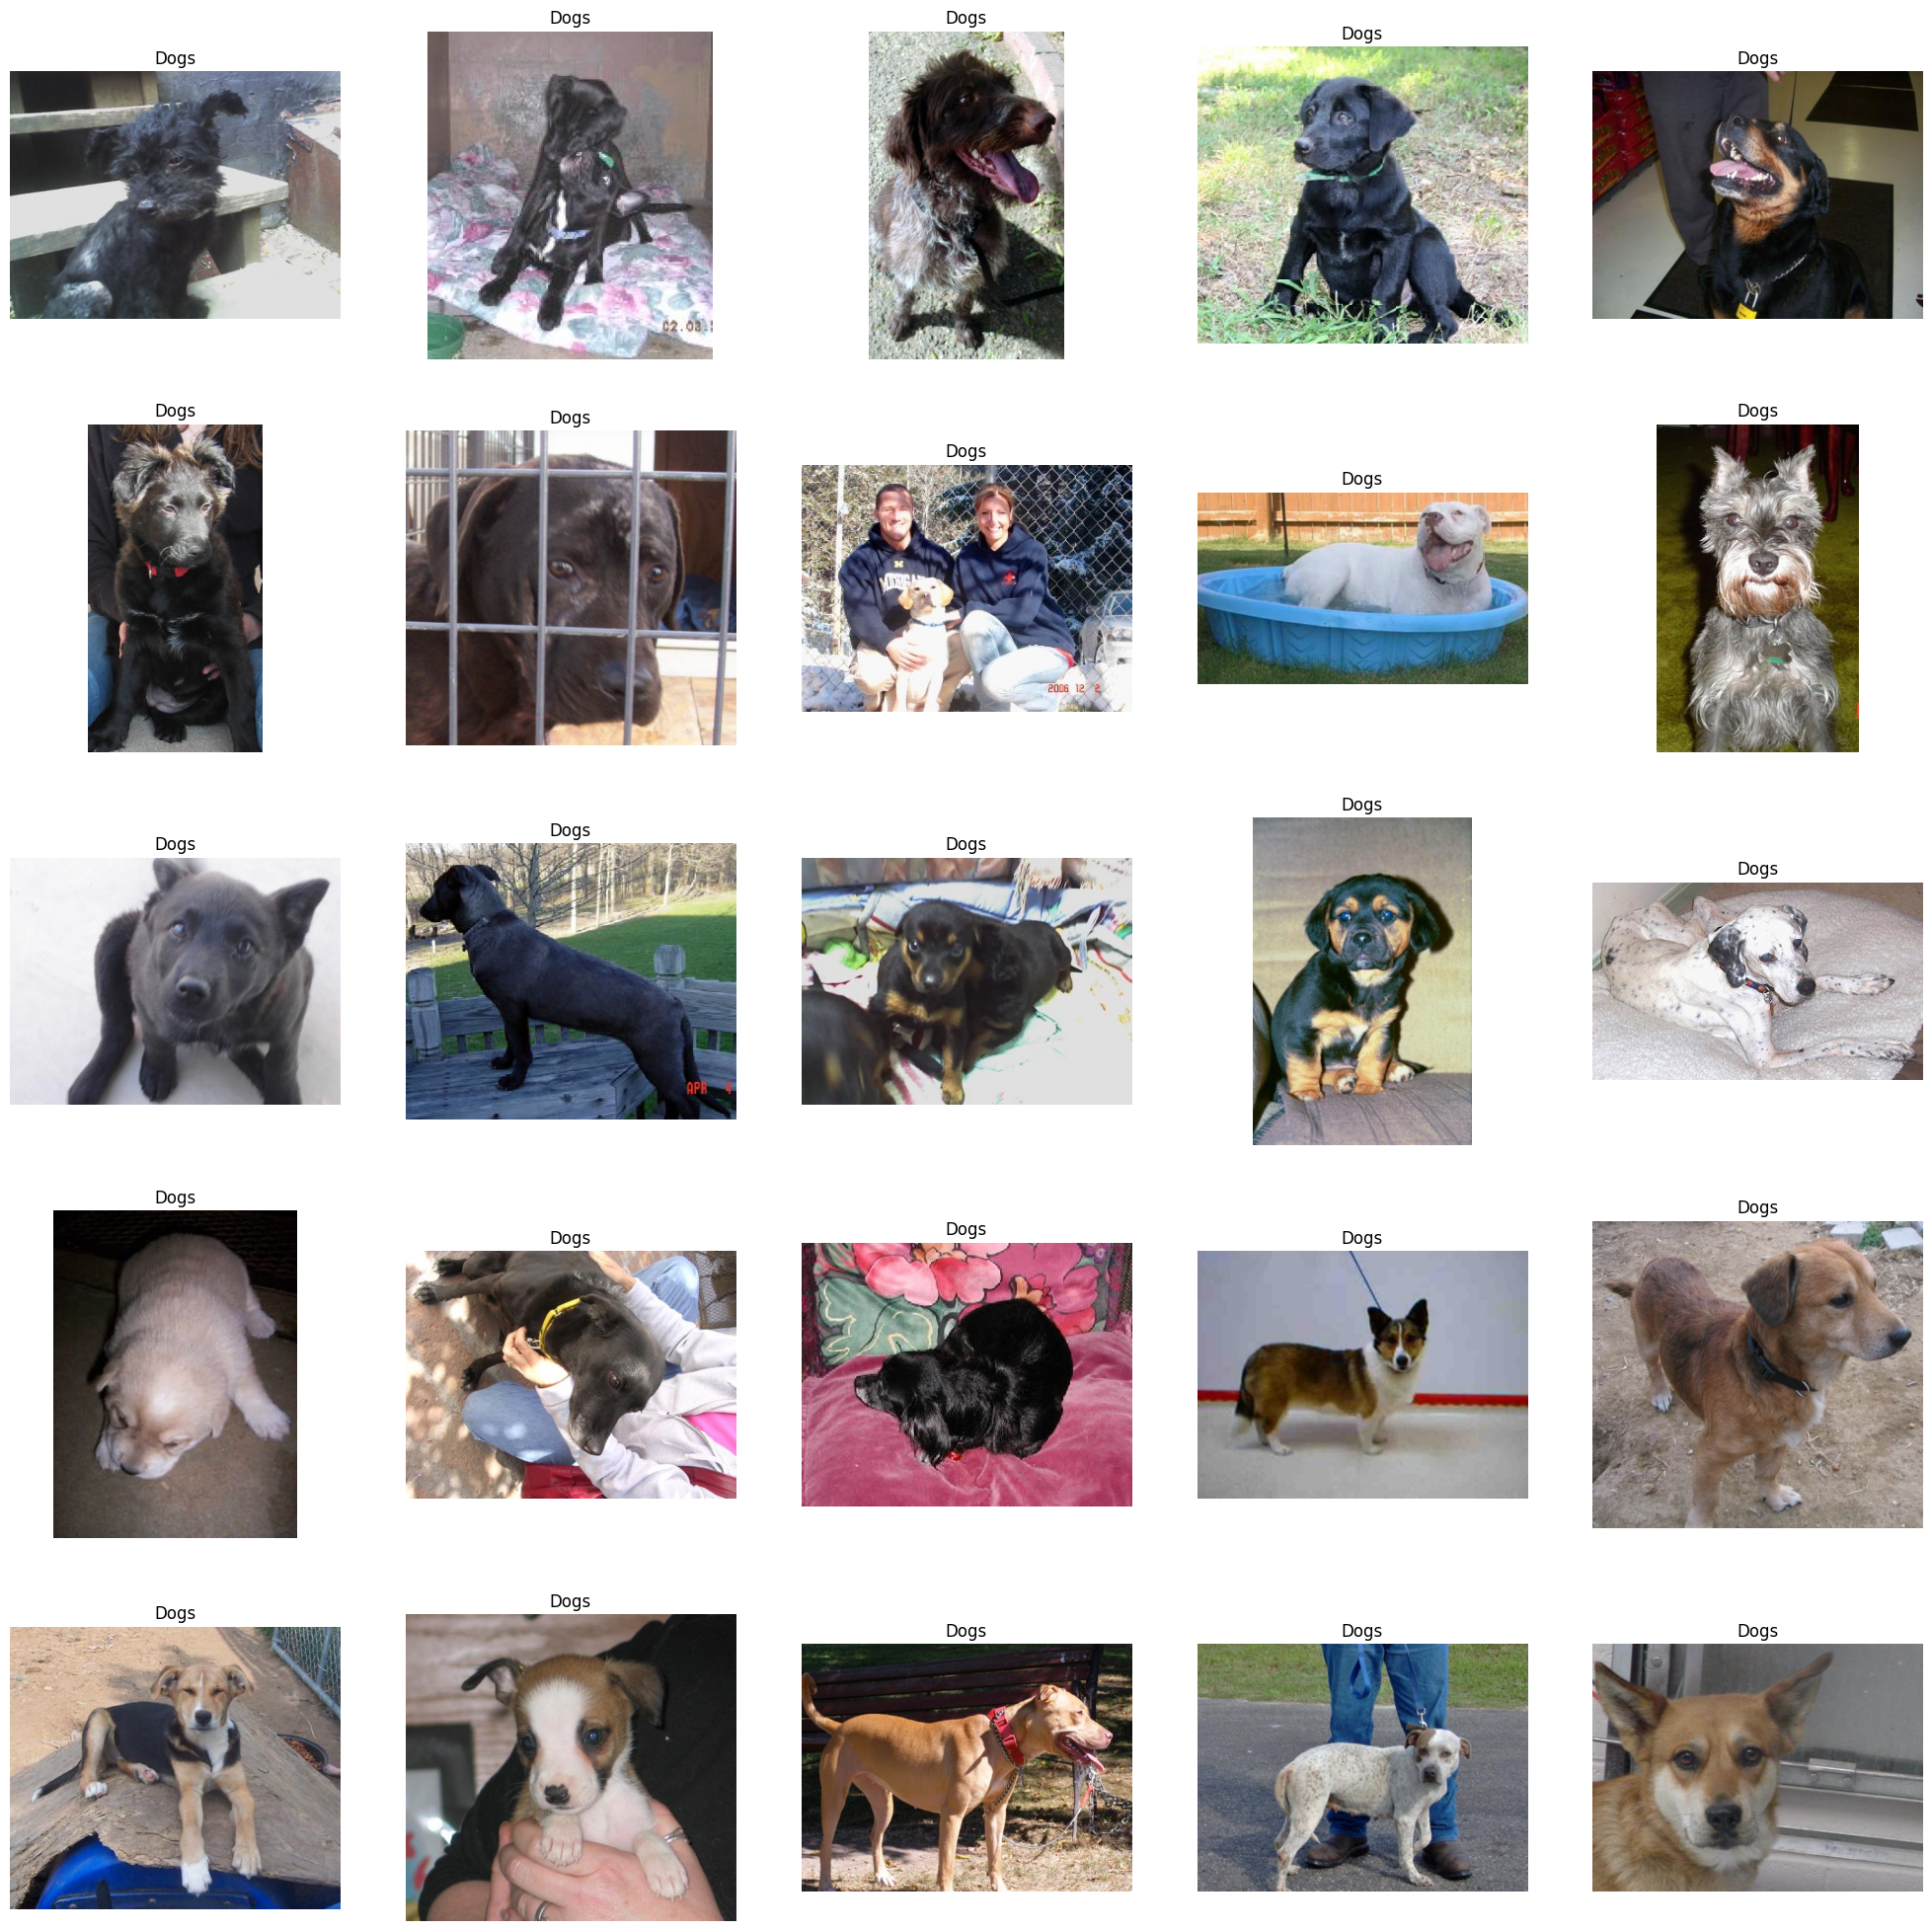

In [18]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

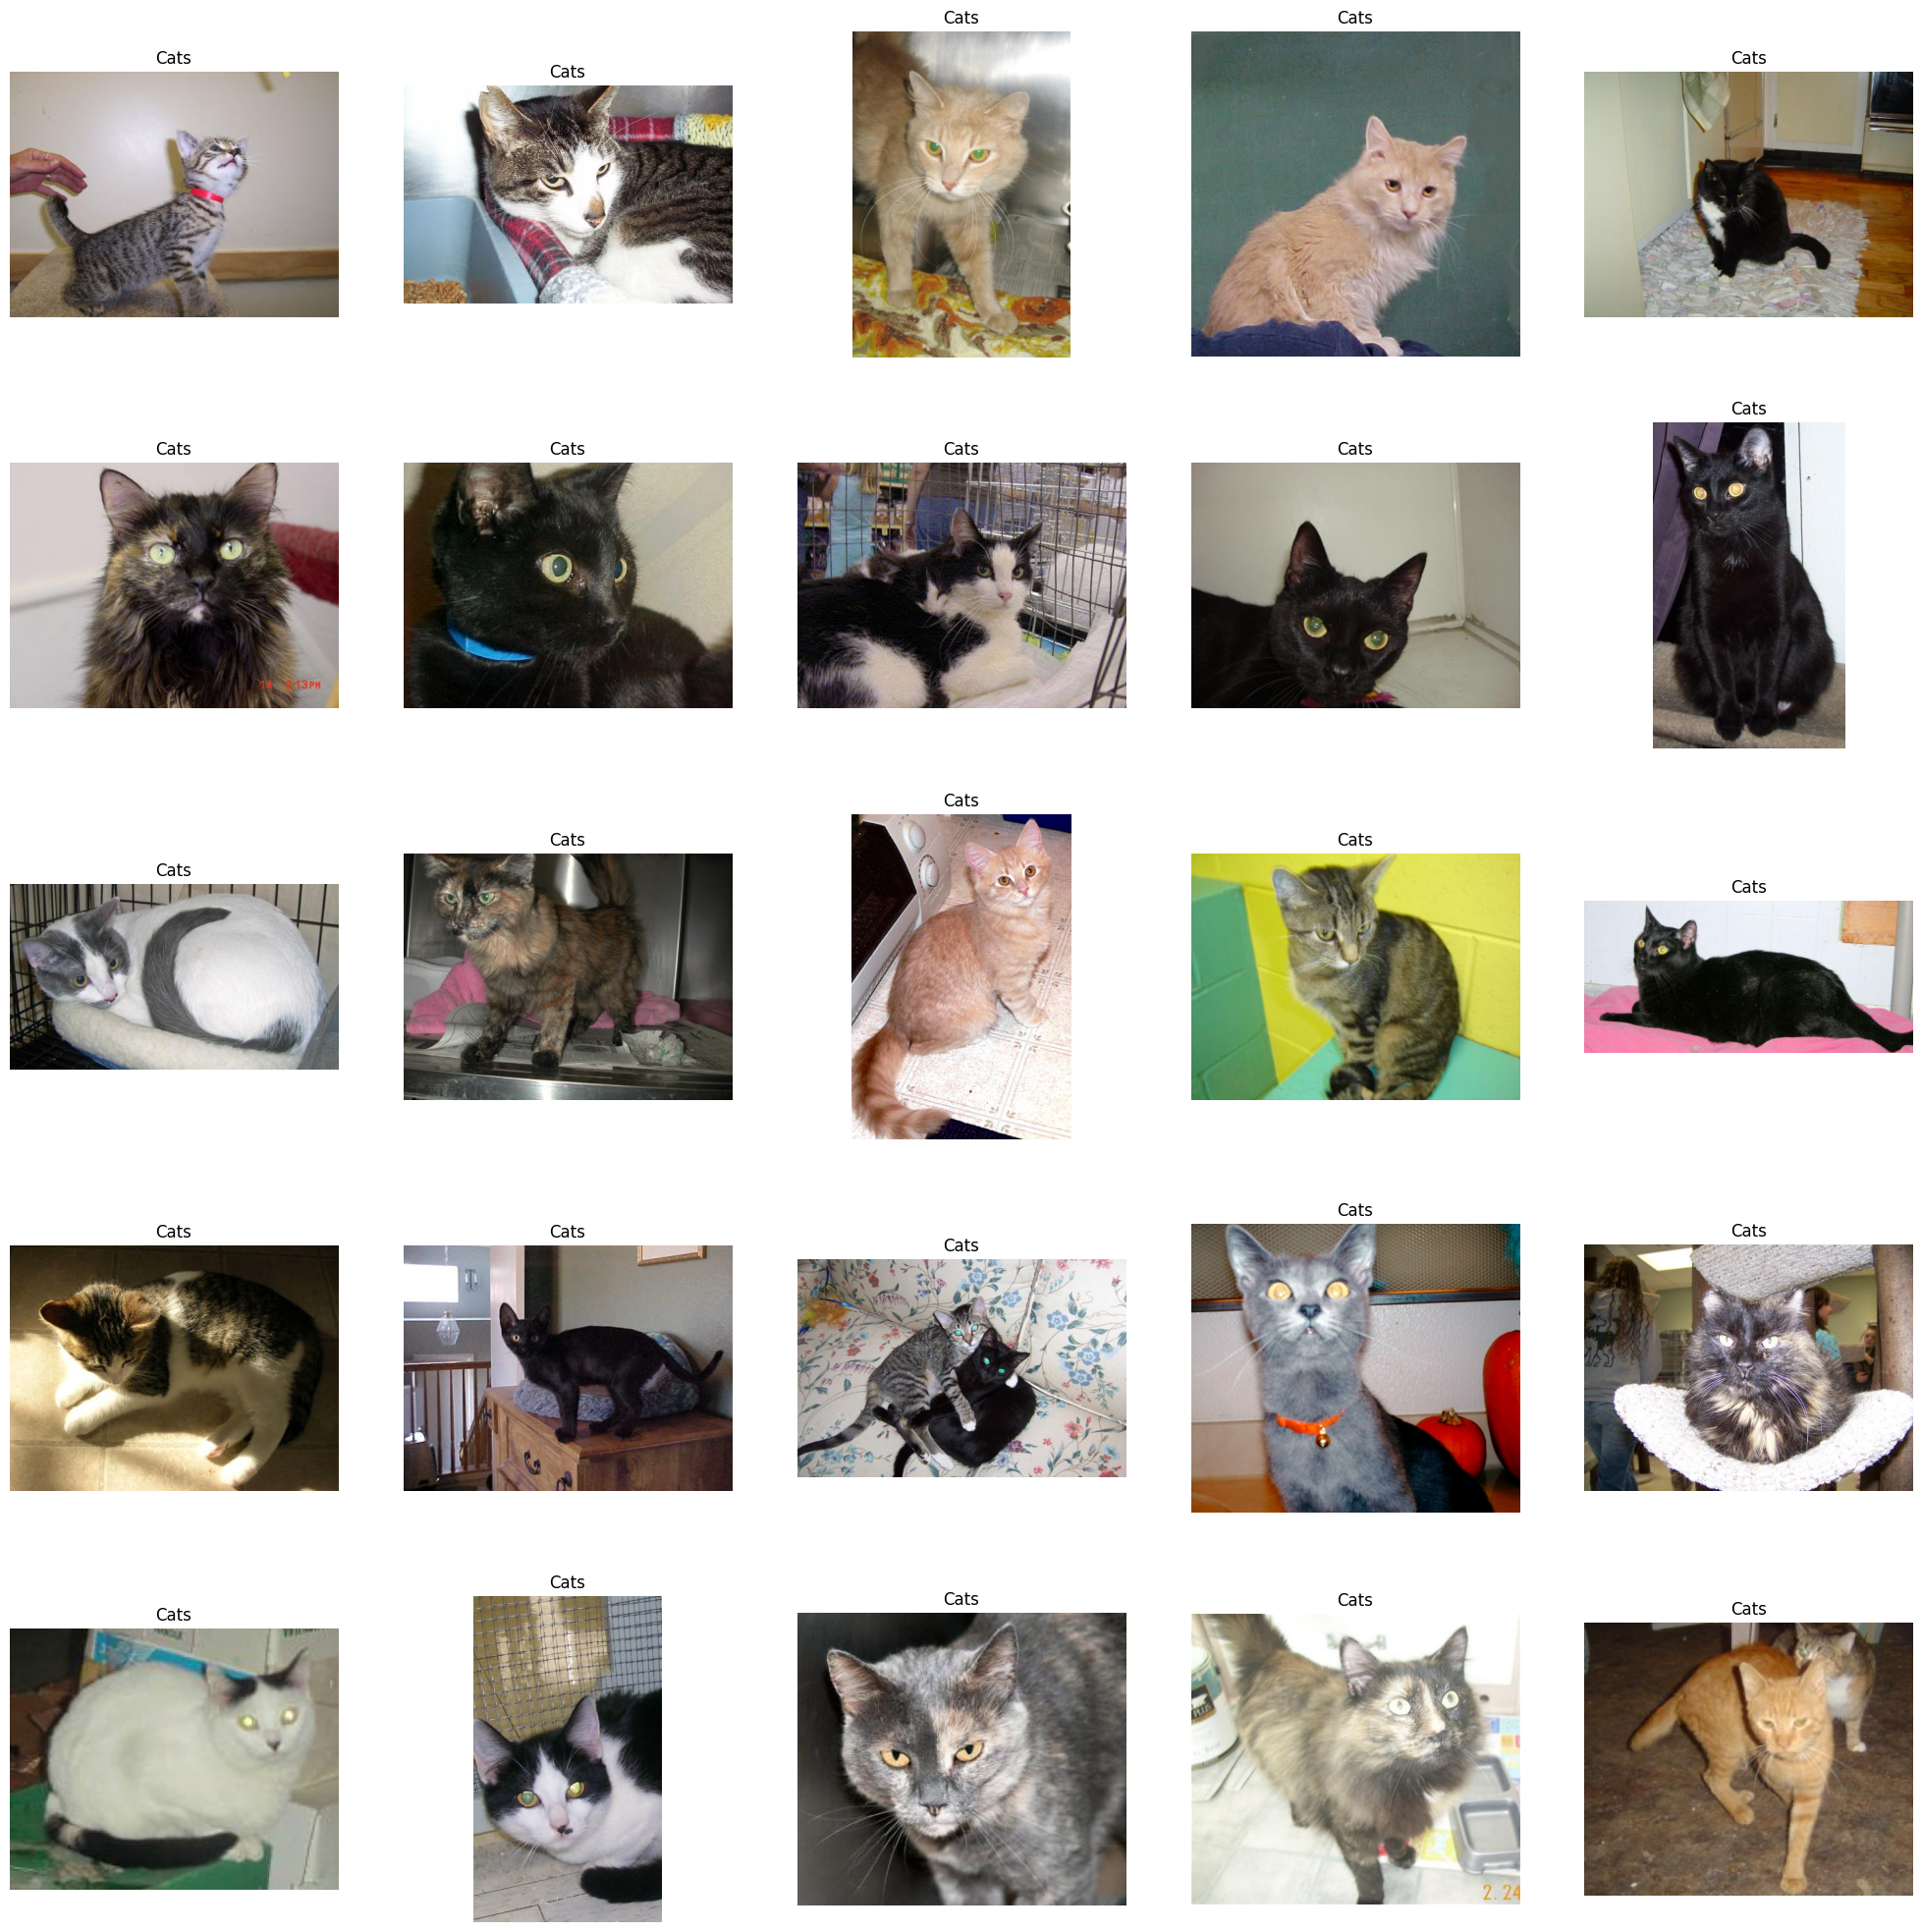

In [19]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Axes: ylabel='count'>

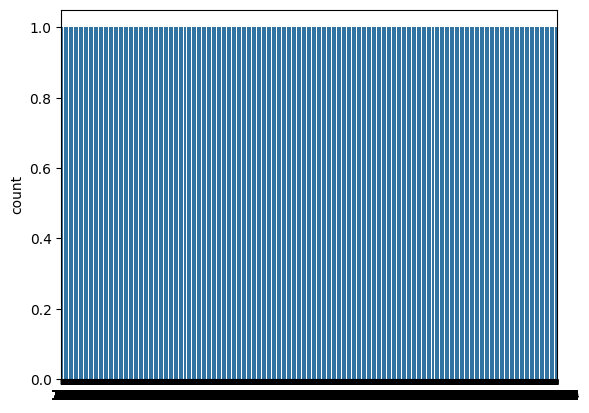

In [20]:
import seaborn as sns
sns.countplot(df['label'])

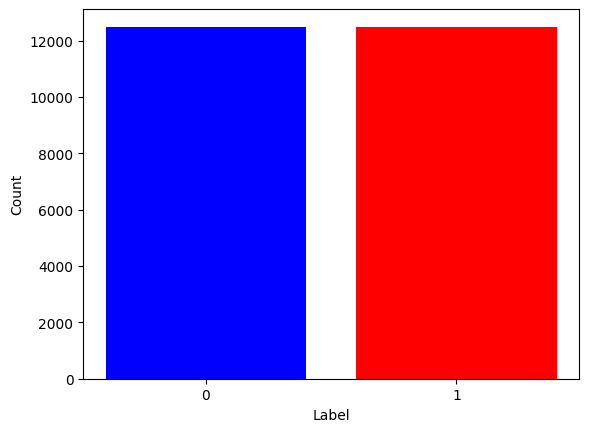

In [21]:
# Different colour for Label 1 and label 0
counts = df['label'].value_counts().sort_index()  # ensures 0 then 1
colors = ['blue','red']
plt.bar(counts.index.astype(str), counts.values, color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#Create Data Generator for the Images
###Data Generators loads the data from the disk for reading and training the data directly, saving RAM space and avoiding possible overflow that might crash the system.

In [22]:
df['label'] = df['label'].astype('str')
df.head()

images label
0  PetImages/Dog/10068.jpg     1
1  PetImages/Dog/10949.jpg     1
2  PetImages/Dog/11828.jpg     1
3     PetImages/Cat/17.jpg     0
4   PetImages/Cat/1372.jpg     0

In [23]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


#Model Building

In [26]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
])

#Dense - single dimension linear layer array

#Conv2D - convolutional layer in 2 dimension

#MaxPooling2D - function to get the maximum pixel value to the next layer

#Flatten - convert 2D array into a 1D array

#Use Dropout if augmentation was not applied on the images to avoid over fitting

#activation='relu' - used commonly for image classification models

#input_shape=(128,128,3) - Resolution size of the images in an RGB color scales. If in grayscale the third parameter is 1.

#activation='sigmoid' - used for binary classification

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 475s 12s/step - accuracy: 0.5132 - loss: 0.7758 - val_accuracy: 0.6258 - val_loss: 0.6419
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 455s 11s/step - accuracy: 0.6351 - loss: 0.6362 - val_accuracy: 0.6742 - val_loss: 0.5914
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 482s 11s/step - accuracy: 0.6753 - loss: 0.5981 - val_accuracy: 0.7074 - val_loss: 0.5574
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 419s 10s/step - accuracy: 0.7082 - loss: 0.5633 - val_accuracy: 0.7334 - val_loss: 0.5220
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 425s 11s/step - accuracy: 0.7225 - loss: 0.5399 - val_accuracy: 0.7060 - val_loss: 0.5566
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 417s 10s/step - accuracy: 0.7304 - loss: 0.5310 - val_accuracy: 0.6884 - val_loss: 0.5716
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 406s 10s/step - accuracy: 0.7361 - loss: 0.5254 - val_accuracy: 0.7634 - val_loss: 0.4901
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 451s 10s/step - accuracy: 0.7571 - loss: 0.4971 - val_accuracy: 0.

#Visualization Of Results

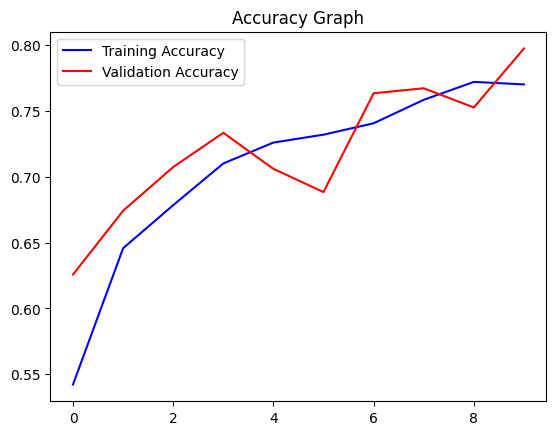

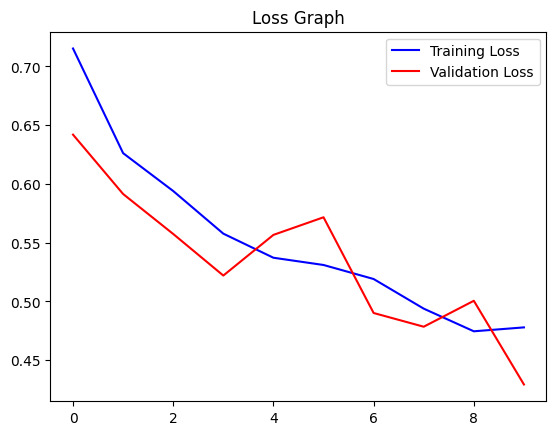

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

#Test with real Image


In [42]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

image_path = '/content/test.jpg'  # adjust to your actual path
try:
    img = load_img(image_path, target_size=(128, 128))
    img_arr = img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)  # shape (1, 128,128,3)
    print("Image loaded and processed, shape:", img_arr.shape)
except FileNotFoundError:
    print(f"File not found: {image_path}")

Image loaded and processed, shape: (1, 128, 128, 3)


#Image prediction of cat or dog

In [47]:
prediction = model.predict(img_arr)[0][0]

if prediction > 0.5:
    print(f"Prediction: Dog ({prediction:.2f})")
else:
    print(f"Prediction: Cat ({prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Dog (0.89)


#Dog=1
#Cat=0

In [52]:
model.save('dog_cat_model.h5')

In [53]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("dog_cat_model.h5")

In [54]:
!pip install opencv-python

In [59]:
import cv2
import numpy as np

video_path = "/content/dog_video.mp4"  # path to your 20s video
cap = cv2.VideoCapture(video_path)

img_size = (128, 128)  # same size used during training
predictions = []
frame_skip = 5
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    if frame_count % frame_skip != 0:
        continue

    # Resize and normalize
    resized = cv2.resize(frame, img_size)
    img_array = resized / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict (0 = cat, 1 = dog)
    pred = model.predict(img_array)[0][0]
    predictions.append(pred)

cap.release()

# Average prediction across frames
avg_pred = np.mean(predictions)
if avg_pred > 0.5:
    print(f"Video Prediction: Dog ({avg_pred:.2f})")
else:
    print(f"Video Prediction: Cat ({avg_pred:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━